# NumPy Linear Algebra

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

- **```vdot(a, b)```** Return the dot product of two vectors
- **```dot(a, b[, out])```** Dot product of two arrays
- **```inner(a, b)```** Inner product of two arrays
- **```outer(a, b[, out])```** Compute the outer product of two vectors
- **```linalg.solve(a, b)```** Solve a linear matrix equation, or system of linear scalar equations
- **```linalg.inv(a)```** Compute the (multiplicative) inverse of a matrix
- **```linalg.det(a)```** Compute the determinant of an array
- **```linalg.eig(a)```** Compute the eigenvalues and right eigenvectors of a square array
- **```linalg.eigvals(a)```** Compute the eigenvalues of a general matrix
- **```matmul(a, b[, out])```** Matrix product of two arrays
- etc.

See: http://mbakker7.github.io/exploratory_computing_with_python


Array A:
[[  4.  -2.   1.]
 [  1.   1.   1.]
 [ 16.   4.   1.]]
rhs: [ 2. -1.  4.]
solution is: [ 0.44444444 -0.55555556 -0.88888889]
specified values of y: [ 2 -1  4]
A @ sol: [ 2. -1.  4.]


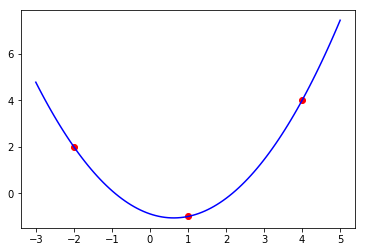

In [2]:
# http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook6_linear_systems/py_exploratory_comp_6_sol.ipynb

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
A = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i] ** 2, xp[i], 1  # Store one row at a time
    rhs[i] = yp[i]
print('Array A:')
print(A)
print('rhs:',rhs)

sol = np.linalg.solve(A, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('A @ sol:', A @ sol)

plt.plot(xp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, 'b');


a,b,c,d:  [ 1.  2.  1. -1.]


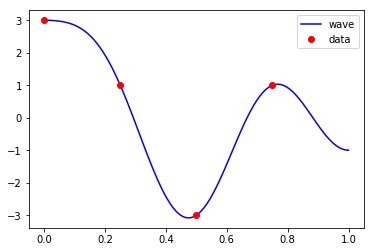

In [3]:
# http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook6_linear_systems/py_exploratory_comp_6_sol.ipynb

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='wave')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');

[  1.   2.   4.   8.  16.]
[ 3.          2.33333333 -6.          1.66666667]
[ 3.  1. -3.  1.]


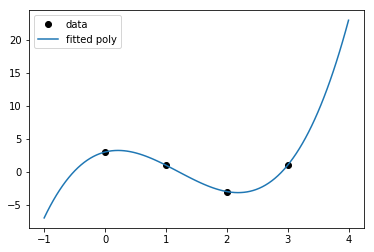

In [5]:
# http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook6_linear_systems/py_exploratory_comp_6_sol.ipynb

def fpoly(x, N):
    rv = np.zeros(N + 1)
    for n in range(N + 1):
        rv[n] = x ** n
    return rv

print(fpoly(2, 4))

def solvepoly(x, y):
    N = len(x) - 1
    mat = np.zeros((N+1, N+1))
    for n in range(N+1):
        mat[n] = fpoly(x[n], N)
    par = np.linalg.solve(mat, y)
    return par
    
xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = solvepoly(xp, yp)
print(a)

def fpolyeval(x, a):
    rv = np.zeros(len(x))
    for n in range(len(a)):
        rv += a[n] * x ** n
    return rv

print(fpolyeval(xp, a))

x = np.linspace(-1,4,100)
y = fpolyeval(x, a)
plt.plot(xp, yp, 'ko', label='data')
plt.plot(x, y, label='fitted poly')
plt.legend(loc='best');

In [5]:
import numpy as np

# Multiply two arrays without numpy
x = [1,2,3]
y = [2,3,4]
product = []
for i in range(len(x)):
    product.append(x[i]*y[i])
print(product)

# Multiply two arrays with numpy
x = np.array([1,2,3])
y = np.array([2,3,4])
product = x * y
print(product)

[2, 6, 12]
[ 2  6 12]


In [1]:
# numpy_dot_prod.py

import numpy as np
from numpy.random import rand
from numpy.linalg import solve, inv

print("Numpy Demo")

# define 3x3 array named first_array
first_array = np.array([[1, 2, 3], [3, 4, 6.7], [5, 9.0, 5]])
print("\nfirst_array:")
print(first_array)

# calculate transpose of first_array
transpose_array = first_array.transpose()
print("\ntranspose_array:")
print(transpose_array)

# calculate inverse of first_array
inverse_array = inv(first_array)
print("\ninverse_array:")
print(inverse_array)

# solve -> first_array * x = second_array
second_array =  np.array([3, 2, 1])
x = solve(first_array, second_array)
print("\nsecond_array/first_array:")
print(x)

# create a 3x3 random matrix of values within [0,1] scaled by 20
third_array = rand(3, 3) * 20
print("\nthird_array:")
print(third_array)

# calculate dot product of first_array * third_array
dot_prod = np.dot(first_array, third_array)
print("\ndot_prod:")
print(dot_prod)

Numpy Demo

first_array:
[[ 1.   2.   3. ]
 [ 3.   4.   6.7]
 [ 5.   9.   5. ]]

transpose_array:
[[ 1.   3.   5. ]
 [ 2.   4.   9. ]
 [ 3.   6.7  5. ]]

inverse_array:
[[-2.27683616  0.96045198  0.07909605]
 [ 1.04519774 -0.56497175  0.1299435 ]
 [ 0.39548023  0.05649718 -0.11299435]]

second_array/first_array:
[-4.83050847  2.13559322  1.18644068]

third_array:
[[  9.74450346  11.34947547   7.04070667]
 [  3.9065578   13.55808118  16.40431322]
 [  4.30867454   9.8769072   12.83880343]]

dot_prod:
[[  30.48364268   68.09635944   78.3657434 ]
 [  73.727861    154.45602939  172.75935588]
 [ 105.42491021  228.15464401  247.03636949]]


## **```vdot(a, b)```**
Return the dot product of two vectors

In [4]:
import numpy as np

a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])

x = np.vdot(a, b)
print(x)

x = np.vdot(b, a)
print(x)

a = np.array([[1, 4], [5, 6]])
b = np.array([[4, 1], [2, 2]])

x = np.vdot(a, b)
print(x)

x = np.vdot(b, a)
print(x)


(70-8j)
(70+8j)
30
30


## **```dot(a, b[, out])```**
Dot product of two arrays

## **```inner(a, b)```**
Inner product of two arrays

## **```outer(a, b[, out])```**
Compute the outer product of two vectors

## **```linalg.solve(a, b)```**
Solve a linear matrix equation, or system of linear scalar equations

## **```linalg.inv(a)```**
Compute the (multiplicative) inverse of a matrix

## **```linalg.det(a)```**
Compute the determinant of an array

## **```linalg.eig(a)```**
Compute the eigenvalues and right eigenvectors of a square array

## **```linalg.eigvals(a)```**
Compute the eigenvalues of a general matrix

## **```matmul(a, b[, out])```**
Matrix product of two arrays

# Rotate Vector

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
print(R)

x = np.array([1, 2])
print(x)
y = R.dot(x)
print(y)

To be completed